<a href="https://colab.research.google.com/github/palmmywatch/data_science_bootcamp07/blob/main/Valorant_Champions_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valorant Champions 2022

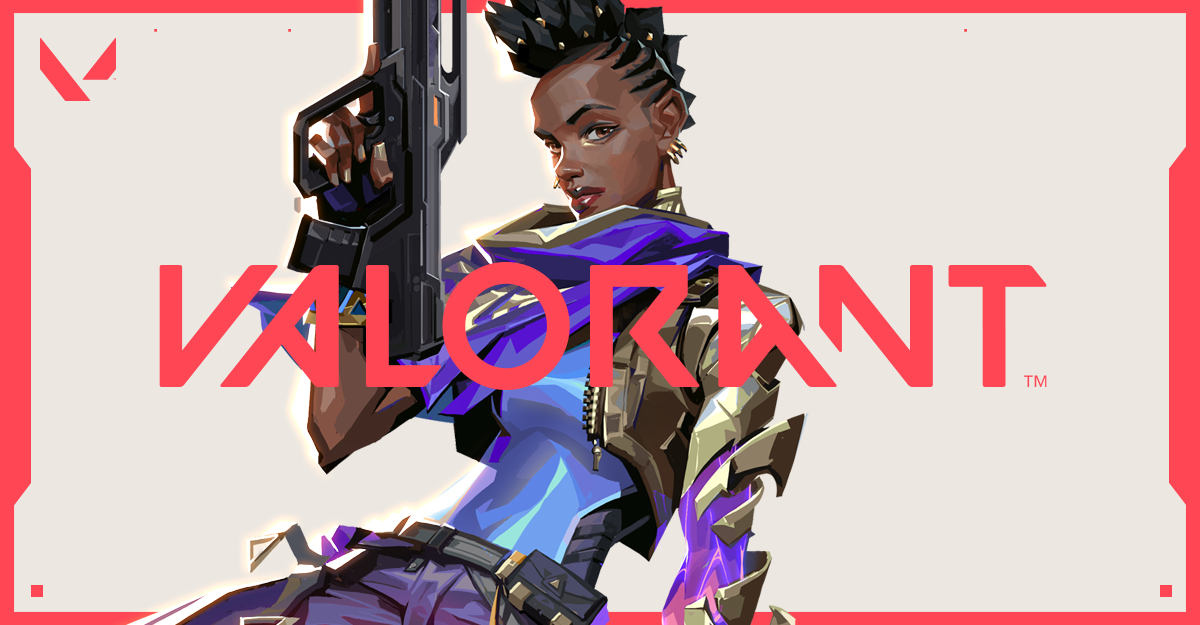

## Load Library

In [ ]:
## library
library(tidyverse)
library(rvest)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




## Load Data

In [ ]:
# load data
vlr_url <- "https://www.vlr.gg/event/stats/1015/valorant-champions-2022"

## Input Column

In [ ]:
# player_name
player_name <- vlr_url %>% 
  read_html() %>% 
  html_elements("div.text-of") %>% 
  html_text2()

In [ ]:
# team
team <- vlr_url %>% 
  read_html() %>% 
  html_elements("div.stats-player-country") %>% 
  html_text2()

In [ ]:
# rounds played
rounds_played <- vlr_url %>% 
  read_html() %>% 
  html_elements("td.mod-rnd") %>% 
  html_text2() %>% 
  as.numeric()

In [ ]:
# player_stat
player_stat <- vlr_url %>% 
  read_html() %>% 
  html_elements("div.color-sq") %>% 
  html_text2()

In [ ]:
# rating
rating <- as.numeric(
  player_stat[c(T, F, F, F, F, F, F, F, F, F, F)]
)

# average combat score
average_combat_score <- as.numeric(
  player_stat[c(F, T, F, F, F, F, F, F, F, F, F)]
)

# kills:deaths
kills_deaths <- as.numeric(
  player_stat[c(F, F, T, F, F, F, F, F, F, F, F)]
)

# kill assists trade survive
kats <- player_stat[c(F, F, F, T, F, F, F, F, F, F, F)]

# average damage per round
average_damage_per_round <- as.numeric(
  player_stat[c(F, F, F, F, T, F, F, F, F, F, F)]
)

# kills per round
kills_per_round <- as.numeric(
  player_stat[c(F, F, F, F, F, T, F, F, F, F, F)]
)

# assists per round
assists_per_round <- as.numeric(
  player_stat[c(F, F, F, F, F, F, T, F, F, F, F)]
)

# first kills per round
first_kills_per_round <- as.numeric(
  player_stat[c(F, F, F, F, F, F, F, T, F, F, F)]
)

# first deaths per round
first_deaths_per_round <- as.numeric(
  player_stat[c(F, F, F, F, F, F, F, F, T, F, F)]
)

# %headshot
headshot <- player_stat[c(F, F, F, F, F, F, F, F, F, T, F)]

# clutch success
clutch_success <- player_stat[c(F, F, F, F, F, F, F, F, F, F, T)]

## Data Frame

In [ ]:
# data frame
df <- data.frame(
  player_name,
  team,
  rounds_played,
  rating,
  average_combat_score,
  kills_deaths,
  kats,
  average_damage_per_round,
  kills_per_round,
  assists_per_round,
  first_kills_per_round,
  first_deaths_per_round,
  headshot,
  clutch_success
)

In [ ]:
# show data frame
df %>%
  head()

,player_name,team,rounds_played,rating,average_combat_score,kills_deaths,kats,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot,clutch_success
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,yay,OPTC,492,1.26,254.6,1.50,73%,159.8,0.93,0.09,0.20,0.08,26%,15%
2,kiNgg,LEV,179,1.26,260.0,1.36,77%,160.9,0.89,0.30,0.23,0.12,23%,11%
3,Laz,ZETA,148,1.23,245.0,1.31,71%,156.1,0.86,0.21,0.15,0.09,28%,20%
4,pANcada,LOUD,366,1.21,210.5,1.25,78%,137.5,0.76,0.39,0.08,0.04,34%,15%
5,Derke,FNC,319,1.20,247.9,1.39,70%,166.2,0.92,0.13,0.17,0.15,34%,21%
6,Shao,FPX,357,1.15,194.5,1.12,80%,133.7,0.68,0.43,0.04,0.04,30%,16%


## Clean Data

In [ ]:
# kats
df1 <- df %>% 
  separate(kats, sep = "%", into = "kats")
df1$kats <- as.numeric(df1$kats) / 100

# headshot
df2 <- df1 %>% 
  separate(headshot, sep = "%", into = "headshot")
df2$headshot <- as.numeric(df2$headshot) / 100

# clutch_success
df3 <- df2 %>% 
  separate(clutch_success, sep = "%", into = "clutch_success")
df3$clutch_success <- as.numeric(df3$clutch_success) / 100

full_data_frame <- df3

Warning message:
“Expected 1 pieces. Additional pieces discarded in 81 rows [1, 2, 3, 4, 5, 6, 7,
8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 1 pieces. Additional pieces discarded in 81 rows [1, 2, 3, 4, 5, 6, 7,
8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 1 pieces. Additional pieces discarded in 70 rows [1, 2, 3, 4, 5, 6, 7,
8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...].”


## Full Data Frame

In [ ]:
View(full_data_frame)

player_name,team,rounds_played,rating,average_combat_score,kills_deaths,kats,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot,clutch_success
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yay,OPTC,492,1.26,254.6,1.50,0.73,159.8,0.93,0.09,0.20,0.08,0.26,0.15
kiNgg,LEV,179,1.26,260.0,1.36,0.77,160.9,0.89,0.30,0.23,0.12,0.23,0.11
Laz,ZETA,148,1.23,245.0,1.31,0.71,156.1,0.86,0.21,0.15,0.09,0.28,0.20
pANcada,LOUD,366,1.21,210.5,1.25,0.78,137.5,0.76,0.39,0.08,0.04,0.34,0.15
Derke,FNC,319,1.20,247.9,1.39,0.70,166.2,0.92,0.13,0.17,0.15,0.34,0.21
Shao,FPX,357,1.15,194.5,1.12,0.80,133.7,0.68,0.43,0.04,0.04,0.30,0.16
Cryocells,XSET,285,1.15,232.2,1.27,0.71,143.4,0.85,0.13,0.18,0.13,0.24,0.19
Sacy,LOUD,366,1.14,194.0,1.14,0.77,127.5,0.68,0.41,0.07,0.05,0.25,0.12
MaKo,DRX,416,1.13,207.8,1.14,0.78,135.9,0.72,0.43,0.07,0.07,0.29,0.14
